http://adsabs.harvard.edu/cgi-bin/nph-abs_connect?db_key=AST&db_key=PRE&qform=AST&arxiv_sel=astro-ph&arxiv_sel=cond-mat&arxiv_sel=cs&arxiv_sel=gr-qc&arxiv_sel=hep-ex&arxiv_sel=hep-lat&arxiv_sel=hep-ph&arxiv_sel=hep-th&arxiv_sel=math&arxiv_sel=math-ph&arxiv_sel=nlin&arxiv_sel=nucl-ex&arxiv_sel=nucl-th&arxiv_sel=physics&arxiv_sel=quant-ph&arxiv_sel=q-bio&sim_query=YES&ned_query=YES&adsobj_query=YES&aut_logic=OR&obj_logic=OR&author=&object=&start_mon=&start_year=&end_mon=&end_year=&ttl_logic=AND&title=1ES+1927%2B654&txt_logic=OR&text=&nr_to_return=200&start_nr=1&jou_pick=ALL&ref_stems=&data_and=ALL&group_and=ALL&start_entry_day=&start_entry_mon=&start_entry_year=&end_entry_day=&end_entry_mon=&end_entry_year=&min_score=&sort=SCORE&data_type=SHORT&aut_syn=YES&ttl_syn=YES&txt_syn=YES&aut_wt=1.0&obj_wt=1.0&ttl_wt=0.3&txt_wt=3.0&aut_wgt=YES&obj_wgt=YES&ttl_wgt=YES&txt_wgt=YES&ttl_sco=YES&txt_sco=YES&version=1m

[Looking into the heart of the peculiar Seyfert galaxy 1ES 1927+654](http://adsabs.harvard.edu/abs/2014cosp...40E.915G)

1ES 1927+654 is one of the objects where observations made at different wavebands appear to contradict each other within the framework of the orientation-based unified model. Based upon its optical spectrum, it was classified as a Seyfert 2 galaxy. However, X-ray observations showed little or no evidence of obscuration. Gallo et al. (2013, MNRAS 433, 421) reported on XMM-Newton and Suzaku observations of the source. To explain the contradictory optical and X-ray observations, they proposed a scenario where the source is seen edge-on but through a tenuous torus. 1ES 1927+654 is radio-loud and appears unresolved in the NRAO VLA Sky Survey (NVSS), with a flux density of 40 mJy. We observed the source with high-resolution radio interferometry using the European VLBI Network (EVN), to ascertain the compact nature of its radio emission. He we report our findings in the context of the geometric and physical model of the object.

[NICER observing campaign of the AGN 1ES 1927+654 following a recent transient event](http://adsabs.harvard.edu/abs/2019HEAD...1730102L)

We report on NICER X-ray follow-up observations of the remarkable nuclear transient AT2018zf (ASASSN-18el) associated with the changing-look Seyfert galaxy 1ES 1927+654. Results from our detailed NICER time-resolved spectral analysis reveal a spectrum dominated by a very soft (~100 eV) blackbody-like component, but with excess emission around 1 keV -- characteristics very different from those of any previous observation of this source. NICER has been monitoring 1ES 1927+654 with 1-3 day cadence starting ~80 days after the ASAS-SN flare detection, during which the X-ray emission - in addition to rapid variability on timescales from 10 ks to 500 seconds -- has undergone a rapid decline of two orders of magnitutude, extended period of quiescence, and re-brightening to fluxes comparable to those following the initial flare. Despite the intense flaring on timescales of hours to days, the ensemble of exposures appear to follow a simple track in spectral evolution. The re-emergence of the power-law that dominated the pre-flare spectrum is evidence that NICER is catching the re-formation of the corona caught in real time following its disruption, which places much needed constraints on the timescale of the corona heating mechanism.

In [77]:
import matplotlib.pyplot as plt

In [1]:
from xspec import *
import xspec

In [464]:
Plot.device='/xs'
#Plot.device='/null'

In [2]:
import stingray
import os
from astropy.io import fits
import pyfits

In [ ]:
path='/Users/brettlv/src_heasoft/1ES1927/1200190132/xti/event_cl/'
filepath='/Users/brettlv/src_heasoft/1ES1927/1200190132/xti/event_cl/src.pha'
lcfilepath='/Users/brettlv/src_heasoft/1ES1927/1200190132/xti/event_cl/src.lc'

path='/Users/brettlv/src_heasoft/1ES1927/1200190277/xti/event_cl/'
filepath='/Users/brettlv/src_heasoft/1ES1927/1200190277/xti/event_cl/src.pha'
lcfilepath='/Users/brettlv/src_heasoft/1ES1927/1200190277/xti/event_cl/src.lc'

In [235]:
#os.listdir('/Users/brettlv/src_heasoft/1ES1927/')

In [265]:
ls

1200190102/              1200190167/              1200190277/
1200190103/              1200190184/              1200190278/
1200190104/              1200190209/              1200190284/
1200190106/              1200190212/              1ES1927+654_mostexp.sh
1200190107/              1200190230/              1ES1927+654download.sh
1200190108/              1200190238/              evt.txt
1200190128/              1200190244/              list.txt
1200190129/              1200190272/              sorted_wget_partfile.sh
1200190132/              1200190273/              wget-log
1200190133/              1200190274/
1200190159/              1200190275/


In [266]:
ls /Users/brettlv/src_heasoft/1ES1927/*/xti/event_cl/src.lc>lc.txt

In [267]:
os.chdir('/Users/brettlv/src_heasoft/1ES1927/')
with open('list.txt','r') as f:
    content=f.readlines()
with open('evt.txt','r') as f:
    evts=f.readlines()    
with open('lc.txt','r') as f:
    lcs=f.readlines()    

In [256]:
for i,i_ in zip(content[:-4],evts[:]):
    print(i.rstrip())

1200190102/
1200190103/
1200190104/
1200190106/
1200190107/
1200190108/
1200190128/
1200190129/
1200190132/
1200190133/
1200190159/
1200190167/
1200190184/
1200190209/
1200190212/
1200190230/
1200190238/
1200190244/
1200190272/
1200190273/
1200190274/
1200190275/
1200190277/
1200190278/
1200190284/


In [463]:
obsid='1200190277/'
pathroot='/Users/brettlv/src_heasoft/1ES1927/%s'%obsid
path=pathroot+'xti/event_cl/'
filepath=path+'src.pha'
clfilepath=path+'src.lc'
bkgspec='/Users/brettlv/src_heasoft/1ES1927/bkg_nicer_rxte_6/1012060227/xti/event_cl/2019-02-13bkg.pha'

print(path)
print(filepath)
print(clfilepath)

os.chdir(path)
AllData.clear()
s1=xspec.Spectrum(filepath)
#Plot.xAxis = "channel"
#s1.ignore('**-35 1909-**')#channel nustar 3-79keV
s1.response='/Users/brettlv/src_heasoft/heasoft-6.25/CALDB/data/nicer/xti/cpf/rmf/nixtiref20170601v001.rmf'
s1.response.arf = "/Users/brettlv/src_heasoft/heasoft-6.25/CALDB/data/nicer/xti/cpf/arf/nixtiaveonaxis20170601v002.arf"
s1.background = bkgspec


Plot.xAxis = "keV"
#s1.ignore('**-0.2 12.0-**')#NICER 0.2-12keV
s1.ignore('**-0.2 2.4-**')
s1.ignore("bad")
AllData.ignore("bad")
#Plot.xAxis = "nm"
#Ignore channel bins corresponding to 15.0 to 20.0 nm wavelengths: s1.ignore("15.-20.")
#s1.show()

#/Users/brettlv/src_heasoft/heasoft-6.25/CALDB/data/nicer/xti/cpf/arf/nixtiaveonaxis20170601v002.arf
#/Users/brettlv/src_heasoft/heasoft-6.25/CALDB/data/nicer/xti/cpf/rmf/nixtiref20170601v001.rmf



hdulist=pyfits.open(clfilepath)
DATEOBS=hdulist[0].header['DATE-OBS']
hdulist.close()

m=Model("pha*(pow)")

Fit.perform()

#Step parameters 1 and 2 through the given range values 
# over a 10x10 2-D grid.
#Fit.steppar("1 20. 30. 10 2 .05 .08 10")

Plot.add=True
#Plot.background=False
Plot.background = True
Plot.xLog=True
Plot.yLog=True
#Plot('ldata')
#Plot('eeuf del')
#Plot("ufspec res")
#Plot("data","model","resid")
print('obsid',obsid)
print('startdate',DATEOBS)
print('bkgdate',bkgspec.split('/')[-1][:10])
Plot.commands = ("label 1 pos 1 .15 \"%s powerlaw\""%DATEOBS,)
#Plot.addCommand("x 1 pos 0.537 \"edge\"")

#Plot.addCommand("label 1 pos 1 .15 \"%s\""%DATEOBS)
Plot("eeuf","del")
#Plot.commands=()

/Users/brettlv/src_heasoft/1ES1927/1200190277/xti/event_cl/
/Users/brettlv/src_heasoft/1ES1927/1200190277/xti/event_cl/src.pha
/Users/brettlv/src_heasoft/1ES1927/1200190277/xti/event_cl/src.lc
obsid 1200190277/
startdate 2019-02-09T03:15:59
bkgdate 2019-02-13


In [ ]:
freeze or thaw 

In [459]:
Plot.iplot()

In [460]:
Plot.iplot("data model")

In [461]:
Plot("eeuf","del")

In [465]:
obsid='1200190277/'
pathroot='/Users/brettlv/src_heasoft/1ES1927/%s'%obsid
path=pathroot+'xti/event_cl/'
filepath=path+'src.pha'
clfilepath=path+'src.lc'
bkgspec='/Users/brettlv/src_heasoft/1ES1927/bkg_nicer_rxte_6/1012060227/xti/event_cl/2019-02-13bkg.pha'

print(path)
print(filepath)
print(clfilepath)

os.chdir(path)
AllData.clear()
s1=xspec.Spectrum(filepath)
#Plot.xAxis = "channel"
#s1.ignore('**-35 1909-**')#channel nustar 3-79keV
s1.response='/Users/brettlv/src_heasoft/heasoft-6.25/CALDB/data/nicer/xti/cpf/rmf/nixtiref20170601v001.rmf'
s1.response.arf = "/Users/brettlv/src_heasoft/heasoft-6.25/CALDB/data/nicer/xti/cpf/arf/nixtiaveonaxis20170601v002.arf"
s1.background = bkgspec


Plot.xAxis = "keV"
#s1.ignore('**-0.2 12.0-**')#NICER 0.2-12keV
s1.ignore('**-0.2 2.4-**')
s1.ignore("bad")
AllData.ignore("bad")
#Plot.xAxis = "nm"
#Ignore channel bins corresponding to 15.0 to 20.0 nm wavelengths: s1.ignore("15.-20.")
#s1.show()

#/Users/brettlv/src_heasoft/heasoft-6.25/CALDB/data/nicer/xti/cpf/arf/nixtiaveonaxis20170601v002.arf
#/Users/brettlv/src_heasoft/heasoft-6.25/CALDB/data/nicer/xti/cpf/rmf/nixtiref20170601v001.rmf



hdulist=pyfits.open(clfilepath)
DATEOBS=hdulist[0].header['DATE-OBS']
hdulist.close()

m=Model("pha*(diskbb)")

Fit.perform()

#Step parameters 1 and 2 through the given range values 
# over a 10x10 2-D grid.
#Fit.steppar("1 20. 30. 10 2 .05 .08 10")

Plot.add=True
#Plot.background=False
Plot.background = True
Plot.xLog=True
Plot.yLog=True
#Plot('ldata')
#Plot('eeuf del')
#Plot("ufspec res")
#Plot("data","model","resid")
print('obsid',obsid)
print('startdate',DATEOBS)
print('bkgdate',bkgspec.split('/')[-1][:10])
Plot.commands = ("label 1 pos 1 .15 \"%s diskbb\""%DATEOBS,)
#Plot.addCommand("label 1 pos 1 .15 \"%s\""%DATEOBS)
Plot("eeuf","del")
#Plot.commands=()

/Users/brettlv/src_heasoft/1ES1927/1200190277/xti/event_cl/
/Users/brettlv/src_heasoft/1ES1927/1200190277/xti/event_cl/src.pha
/Users/brettlv/src_heasoft/1ES1927/1200190277/xti/event_cl/src.lc
obsid 1200190277/
startdate 2019-02-09T03:15:59
bkgdate 2019-02-13


In [419]:
Plot('eeuf res')

In [418]:
Plot('model')

In [452]:
Plot.commands

('label 1 pos 1 .15 "2019-02-09T03:15:59"',)

In [449]:
print(Plot.commands)

('label 1 pos 1 .15 "2019-02-09T03:15:59"', 'label 1 pos 1 .15 "2019-02-09T03:15:59"', 'label 1 pos 1 .15 "2019-02-09T03:15:59"', 'label 1 pos 1 .15 "2019-02-09T03:15:59"', 'label 1 pos 1 .15 "2019-02-09T03:15:59"')


In [382]:
#Plot.commands = ()
print(Plot.commands)
Plot.delCommand(1)
print(Plot.commands)

('label 1 pos 1 .15 "2019-02-09T03:15:59"',)
()


In [378]:
print(Plot.commands)

('label 1 pos 1 .15 "2019-02-09T03:15:59"', 'label 1 pos 1 .15 "2019-02-10T00:49:00"', 'label 1 pos 1 .15 "2019-02-10T00:49:00"')


In [ ]:
Plot.xLog=False
Plot.yLog=False
Plot('data')
Plot('data')

#Single panel plots
Plot("data")
Plot("model")
Plot("ufspec")
#Multi panel plots
Plot("data chisq")
Plot("data","model","resid")
Plot.show()

Plot.xAxis="keV"
Plot('eeuf del')
xErrs = Plot.xErr()
yErrs = Plot.yErr()
#xVals = Plot.x()
#yVals = Plot.y()
modVals = Plot.model()

In [422]:
Plot.xAxis="channel"
Plot("data")

In [193]:
AllModels.calcFlux("0.2 2.0")
AllModels.calcFlux("2.0 10.0")#Model Flux   0.11963 photons (3.2995e-09 ergs/cm^2/s) range (3.0000 - 78.000 keV)

AllModels.calcFlux(".3 1.0")
AllModels.calcFlux(".1 10.0 err")
AllData.show()

In [324]:
#from xspec import *
import matplotlib.pyplot as plt

# PyXspec operations:
#Plot.device = '/null'
Plot('eeuf')
# Get coordinates from plot:
energy = Plot.x()
spec = Plot.y()
folded = Plot.model()
# Plot using Matplotlib:
plt.plot(energy, spec, 'ro', energy, folded)
plt.xlabel('keV')
plt.ylabel('keV2')
plt.show()
#plt.savefig('myplot')

In [269]:
lcs

['/Users/brettlv/src_heasoft/1ES1927/1200190103/xti/event_cl/src.lc\n',
 '/Users/brettlv/src_heasoft/1ES1927/1200190104/xti/event_cl/src.lc\n',
 '/Users/brettlv/src_heasoft/1ES1927/1200190106/xti/event_cl/src.lc\n',
 '/Users/brettlv/src_heasoft/1ES1927/1200190107/xti/event_cl/src.lc\n',
 '/Users/brettlv/src_heasoft/1ES1927/1200190108/xti/event_cl/src.lc\n',
 '/Users/brettlv/src_heasoft/1ES1927/1200190128/xti/event_cl/src.lc\n',
 '/Users/brettlv/src_heasoft/1ES1927/1200190129/xti/event_cl/src.lc\n',
 '/Users/brettlv/src_heasoft/1ES1927/1200190132/xti/event_cl/src.lc\n',
 '/Users/brettlv/src_heasoft/1ES1927/1200190133/xti/event_cl/src.lc\n',
 '/Users/brettlv/src_heasoft/1ES1927/1200190159/xti/event_cl/src.lc\n',
 '/Users/brettlv/src_heasoft/1ES1927/1200190167/xti/event_cl/src.lc\n',
 '/Users/brettlv/src_heasoft/1ES1927/1200190184/xti/event_cl/src.lc\n',
 '/Users/brettlv/src_heasoft/1ES1927/1200190209/xti/event_cl/src.lc\n',
 '/Users/brettlv/src_heasoft/1ES1927/1200190212/xti/event_cl/src

In [270]:
len(lcs)

24

In [271]:
pwd

'/Users/brettlv/src_heasoft/1ES1927'

In [107]:
hdulist=pyfits.open(lcs[4].rstrip())
DATEOBS=hdulist[0].header['DATE-OBS']
print(starttime)
print(np.average(hdulist[1].data['RATE']))
plt.scatter(hdulist[1].data['TIME'],hdulist[1].data['RATE'])
plt.savefig('1ESlcpic/%s.png'%DATEOBS,dpi=300)

58537.42963175926
19.1276


In [245]:
rm lcurve.txt
times=[]
rates=[]
for i in lcs:
    hdulist=pyfits.open(i.rstrip())
    starttime=hdulist[0].header['MJD-OBS']   
    #print('{0:<5} {1:<5}'.format(starttime,np.average(hdulist[1].data['RATE'])))                
    #time.append(np.float64(starttime)) 
    with open('lcurve.txt','a') as f:
        f.write('{0:<5},{1:<5}\n'.format(starttime,np.average(hdulist[1].data['RATE'])))
    DATEOBS=hdulist[0].header['DATE-OBS']
    rates.append(np.average(hdulist[1].data['RATE']))    
    #plt.scatter(hdulist[1].data['TIME'],hdulist[1].data['RATE'])
    #plt.savefig('1ESlcpic/%s.png'%DATEOBS,dpi=300)
    hdulist.close()             

os.chdir('/Users/brettlv/Downloads/')
os.mkdir('1ESlcpic')

In [163]:
for i in lcs:
    hdulist=pyfits.open(i.rstrip())
    DATEOBS=hdulist[0].header['DATE-OBS']
    rates.append(np.average(hdulist[1].data['RATE']))    
    plt.figure()
    plt.scatter(hdulist[1].data['TIME'],hdulist[1].data['RATE'])
    plt.savefig('1ESlcpic/%s.png'%DATEOBS,dpi=300)
    hdulist.close()             

/Users/brettlv/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [246]:
cat lcurve.txt

58262.03144888889,8.20703125
58262.99639101852,18.850852966308594
58264.9903725,26.693632125854492
58266.01951601852,8.982115745544434
58267.04863638888,19.127552032470703
58291.98747898148,3.079279661178589
58293.14587018518,10.779623985290527
58296.04838175926,5.488863468170166
58297.01618268518,5.172883033752441
58347.31030305556,7.663390159606934
58375.40024518518,18.342472076416016
58404.02788407407,51.44435119628906
58434.05524518518,40.76781463623047
58437.14043037037,18.56334686279297
58456.19332388889,11.089228630065918
58464.74477064815,84.49376678466797
58477.01652990741,53.50965118408203
58518.05409935185,62.271202087402344
58519.01715490741,77.35588836669922
58520.04463175926,96.9146499633789
58521.46015259259,136.74937438964844
58523.13750212963,83.61034393310547
58524.03750212963,110.20709228515625
58537.42963175926,47.022945404052734


In [247]:
lcurve=np.loadtxt('lcurve.txt',delimiter=',',dtype=np.str)

In [248]:
lcurve

array([['58262.03144888889', '8.20703125'],
       ['58262.99639101852', '18.850852966308594'],
       ['58264.9903725', '26.693632125854492'],
       ['58266.01951601852', '8.982115745544434'],
       ['58267.04863638888', '19.127552032470703'],
       ['58291.98747898148', '3.079279661178589'],
       ['58293.14587018518', '10.779623985290527'],
       ['58296.04838175926', '5.488863468170166'],
       ['58297.01618268518', '5.172883033752441'],
       ['58347.31030305556', '7.663390159606934'],
       ['58375.40024518518', '18.342472076416016'],
       ['58404.02788407407', '51.44435119628906'],
       ['58434.05524518518', '40.76781463623047'],
       ['58437.14043037037', '18.56334686279297'],
       ['58456.19332388889', '11.089228630065918'],
       ['58464.74477064815', '84.49376678466797'],
       ['58477.01652990741', '53.50965118408203'],
       ['58518.05409935185', '62.271202087402344'],
       ['58519.01715490741', '77.35588836669922'],
       ['58520.04463175926', '96.91

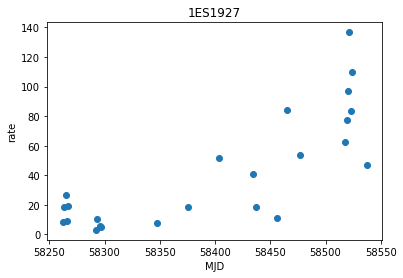

In [249]:
plt.figure()
plt.scatter(lcurve[:,0],lcurve[:,1])
plt.title('1ES1927')
plt.xlabel('MJD')
plt.ylabel('rate')
#plt.savefig('/Users/brettlv/blog/IHEP_sync/Photos/1ES1927lc.png',dpi=300)
plt.show()

In [423]:
hdulist=pyfits.open('/Users/brettlv/src_heasoft/1ES1927/1200190103/xti/event_cl/src.pha')
#hdulist=pyfits.open('/Users/brettlv/src_heasoft/1ES1927/1200190277/xti/event_cl/src.lc')
#hdulist=pyfits.open('/Users/brettlv/src_heasoft/1ES1927/1200190132/xti/event_cl/src.lc')

In [424]:
hdulist.info()

Filename: /Users/brettlv/src_heasoft/1ES1927/1200190103/xti/event_cl/src.pha
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     251   ()              
1    SPECTRUM    BinTableHDU    251   1501R x 2C   [J, J]   
2    GTI         BinTableHDU     50   47R x 2C     [1D, 1D]   


In [58]:
hdulist[1].data['TIME'][:3]

array([  0.,  16.,  32.])

In [67]:
hdulist[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'NICER   '           / Telescope (mission) name                       
DATAMODE= 'PHOTON  '           / Datamode                                       
DETNAM  = 'NONE    '           / Detector                                       
INSTRUME= 'XTI     '           / Instrument name                                
OBJECT  = 'ASASSN-18el'        / Name of observed object                        
ONTIME  = 1.457700000000000E+04 / On-source time                                
EXPOSURE= 1.457700000000000E

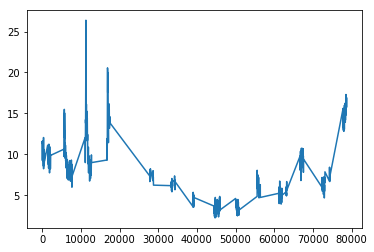

In [59]:
plt.plot(hdulist[1].data['TIME'],hdulist[1].data['RATE'])
plt.show()

In [63]:
import numpy as np
time=hdulist[0].header['MJD-OBS']
ratebar=np.average(hdulist[1].data['RATE'])